In [1]:
#importing packages
import os
os.environ['USE_PYGEOS'] = '0'
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Load indices DataFrame from the CSV file
directory_path='S:/mc5545/SA_Drone_data/Indices_csv/'
df1_i = pd.read_csv(f'{directory_path}indices_2006_burnplot18.csv', index_col=0)
df2_i = pd.read_csv(f'{directory_path}indices_2016_burn2016.csv', index_col=0)
df3_i = pd.read_csv(f'{directory_path}indices_2017_burn2017.csv', index_col=0)
df4_i = pd.read_csv(f'{directory_path}indices_2019_burn2019.csv', index_col=0)
df5_i = pd.read_csv(f'{directory_path}indices_2020_burnplot17.csv', index_col=0)
df6_i = pd.read_csv(f'{directory_path}indices_2022_burn2022.csv', index_col=0)


# Load textures DataFrame from the CSV file
directory_path='S:/mc5545/SA_Drone_data/textures_csv/'
df1_t = pd.read_csv(f'{directory_path}textures_2006_burnplot18.csv', index_col=0)
df2_t = pd.read_csv(f'{directory_path}textures_2016_burn2016.csv', index_col=0)
df3_t = pd.read_csv(f'{directory_path}textures_2017_burn2017.csv', index_col=0)
df4_t = pd.read_csv(f'{directory_path}textures_2019_burn2019.csv', index_col=0)
df5_t = pd.read_csv(f'{directory_path}textures_2020_burnplot17.csv', index_col=0)
df6_t = pd.read_csv(f'{directory_path}textures_2022_burn2022.csv', index_col=0)

# Concatenate the indices and textures features into a new df along the columns (axis=1) 
df1 = pd.concat([df1_i, df1_t], axis=1)
df2 = pd.concat([df2_i, df2_t], axis=1)
df3 = pd.concat([df3_i, df3_t], axis=1)
df4 = pd.concat([df4_i, df4_t], axis=1)
df5 = pd.concat([df5_i, df5_t], axis=1)
df6 = pd.concat([df6_i, df6_t], axis=1)

dataframes = [df1, df2, df3, df4, df5, df6]

df1['Year'] = 2006
df2['Year'] = 2016
df3['Year'] = 2017
df4['Year'] = 2019
df5['Year'] = 2020
df6['Year'] = 2022

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Concatenate DataFrames
concatenated_df = pd.concat(dataframes)
# List of columns to drop
columns_to_drop = ['x', 'y']

# Drop the specified columns
X= concatenated_df.drop(columns=columns_to_drop)
X = X.drop("Year", axis=1)  # Assuming "year" is the column containing the target variable

y = concatenated_df["Year"]

del (df1,df2,df3,df4,df5,df6,df1_i,df2_i,df3_i,df4_i,df5_i,df6_i,
     df1_t,df2_t,df3_t,df4_t,df5_t,df6_t)

### Feature Selection Techniques: Broadly categorized into three types: filter methods, wrapper methods, and embedded methods. 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 510 out of 510 | elapsed:  1.0min finished

[2024-03-15 09:06:45] Features: 1/10 -- score: 0.539156626506024[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 509 out of 509 | elapsed:  1.0min finished

[2024-03-15 09:07:47] Features: 2/10 -- score: 0.7801204819277109[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 508 out of 508 | elapsed:  1.1min finished

[2024-03-15 09:08:52] Features: 3/10 -- score: 0.8783132530120481[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

Selected feature indices: [10, 120, 130, 131, 259, 269, 284, 290, 333, 500]
Selected feature names: Index(['CV_RedEdge', 'BAI', 'CVI', 'Std_CVI', 'CV_SRrr', 'CV_RENDVI', 'CV_LCI',
       'MEVI', 'mean_CV_band4', 'correlation_mean_band3'],
      dtype='object')
Accuracy on the test set: 0.96


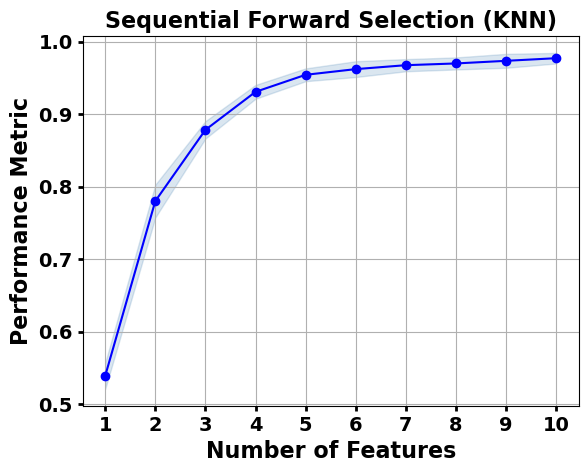

In [2]:
#%% KNN with SequentialFeatureSelector mlxtend
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
import numpy as np
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=6)  # You can adjust the number of neighbors

# Use Sequential Feature Selector for feature selection
num_features_to_select = 10  # Specify the number of features you want to select
sfs_selector = SequentialFeatureSelector(knn_classifier,
                                         k_features=num_features_to_select, 
                                         forward=True, floating=False, verbose=2,
                                         scoring='accuracy',
                                         cv=5)
sfs_selector.fit(X_train_scaled, y_train)

# Get the selected feature indices
selected_feature_indices = list(sfs_selector.k_feature_idx_)
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)

# Train KNN classifier on the selected features
knn_classifier.fit(X_train_scaled[:, selected_feature_indices], y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled[:, selected_feature_indices])

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Plot the results on training set
fig1 = plot_sfs(sfs_selector.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (KNN)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Features', fontsize=16, fontweight='bold')
plt.ylabel('Performance Metric', fontsize=16, fontweight='bold')
plt.grid()

# Make x and y ticks bold
plt.gca().tick_params(axis='x', which='both', labelsize=14, width=2)
plt.gca().tick_params(axis='y', which='both', labelsize=14, width=2)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_test and y_pred are your actual and predicted labels respectively
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Coefficient:", "{:.2f}%".format(kappa * 100))
# Assuming y_test and y_pred are your actual and predicted labels respectively
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print ("Precision:" "{:.2f}%".format(precision * 100))
print("Recall:", "{:.2f}%".format(recall * 100))
print("F1 Score:", "{:.2f}%".format(f1_score * 100))

# Print classification report
print("Classification Report KNN:")
print(classification_report(y_test, y_pred))



Cohen's Kappa Coefficient: 94.55%
Precision:95.70%
Recall: 95.65%
F1 Score: 95.59%
Classification Report KNN:
              precision    recall  f1-score   support

        2006       0.99      0.99      0.99       214
        2016       0.98      1.00      0.99       129
        2017       0.88      0.80      0.84        35
        2019       0.91      0.97      0.94       125
        2020       0.93      0.97      0.95       116
        2022       0.98      0.85      0.91        93

    accuracy                           0.96       712
   macro avg       0.94      0.93      0.94       712
weighted avg       0.96      0.96      0.96       712



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 510 out of 510 | elapsed:    9.2s finished

[2024-03-15 09:25:21] Features: 1/10 -- score: 0.5716867469879519[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 509 out of 509 | elapsed:    9.8s finished

[2024-03-15 09:25:31] Features: 2/10 -- score: 0.744578313253012[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 508 out of 508 | elapsed:    9.8s finished

[2024-03-15 09:25:41] Features: 3/10 -- score: 0.8391566265060242[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

Accuracy on the test set: 0.95
Selected feature indices: [  9  10 130 216 250 259 260 403 422 500]
Selected feature names: Index(['CV_Red', 'CV_RedEdge', 'CVI', 'Std_MGRVI', 'M3Cl', 'CV_SRrr', 'REP',
       'dissimilarity_skewness_band2', 'homogeneity_skewness_band1',
       'correlation_mean_band3'],
      dtype='object')


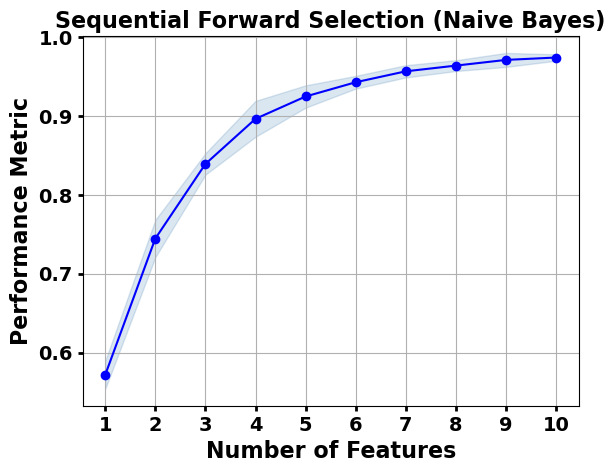

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import numpy as np

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
naive_bayes_classifier = GaussianNB()

# Apply sequential forward feature selection from mlxtend to the Naive Bayes classifier
num_features_to_select = 10  # Specify the number of features you want to select
sfs_selector = SequentialFeatureSelector(naive_bayes_classifier, 
                                         k_features=num_features_to_select, 
                                         forward=True, floating=False, verbose=2, 
                                         scoring='accuracy', cv=5)
X_train_selected = sfs_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = sfs_selector.transform(X_test_scaled)

# Train Naive Bayes classifier on the selected features
naive_bayes_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = np.array(sfs_selector.k_feature_idx_)
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)

# Plot the results on tranning set
fig1 = plot_sfs(sfs_selector.get_metric_dict(), kind='std_dev')
#plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (Naive Bayes)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Features', fontsize=16, fontweight='bold')
plt.ylabel('Performance Metric', fontsize=16, fontweight='bold')
plt.grid()

# Make x and y ticks bold
plt.gca().tick_params(axis='x', which='both', labelsize=14, width=2)
plt.gca().tick_params(axis='y', which='both', labelsize=14, width=2)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_test and y_pred are your actual and predicted labels respectively
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Coefficient:", "{:.2f}%".format(kappa * 100))
# Assuming y_test and y_pred are your actual and predicted labels respectively
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print ("Precision:" "{:.2f}%".format(precision * 100))
print("Recall:", "{:.2f}%".format(recall * 100))
print("F1 Score:", "{:.2f}%".format(f1_score * 100))

# Print classification report
print("Classification Report NB:")
print(classification_report(y_test, y_pred))

Cohen's Kappa Coefficient: 94.03%
Precision:95.35%
Recall: 95.22%
F1 Score: 95.22%
Classification Report NB:
              precision    recall  f1-score   support

        2006       0.99      0.98      0.98       214
        2016       0.99      0.98      0.99       129
        2017       0.90      0.80      0.85        35
        2019       0.94      0.94      0.94       125
        2020       0.88      0.97      0.92       116
        2022       0.97      0.90      0.93        93

    accuracy                           0.95       712
   macro avg       0.94      0.93      0.93       712
weighted avg       0.95      0.95      0.95       712



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 510 out of 510 | elapsed:   25.0s finished

[2024-04-03 08:25:33] Features: 1/9 -- score: 0.558433734939759[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 509 out of 509 | elapsed:   36.8s finished

[2024-04-03 08:26:10] Features: 2/9 -- score: 0.7560240963855421[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 508 out of 508 | elapsed:   54.5s finished

[2024-04-03 08:27:04] Features: 3/9 -- score: 0.8602409638554217[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

Accuracy on the test set: 0.97
Selected feature indices: [ 34  39 121 130 248 250 269 272 413]
Selected feature names: Index(['CV_NDRE', 'CV_GNDVI', 'Std_BAI', 'CVI', 'kurtosis_PSRI', 'M3Cl',
       'CV_RENDVI', 'skewness_TCARI', 'homogeneity_CV_band4'],
      dtype='object')


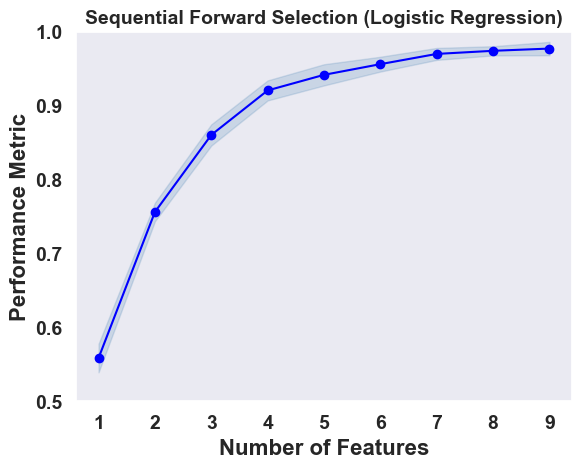

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import numpy as np

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression classifier
logisticreg_classifier = LogisticRegression(max_iter=1000)

# Apply sequential forward feature selection from mlxtend to the logistic regressions classifier
num_features_to_select = 9  # Specify the number of features you want to select
sfs_selector = SequentialFeatureSelector(logisticreg_classifier, 
                                         k_features=num_features_to_select, 
                                         forward=True, floating=False, verbose=2, 
                                         scoring='accuracy', cv=5)
X_train_selected = sfs_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = sfs_selector.transform(X_test_scaled)

# Train Logistic Regression classifier on the selected features
logisticreg_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logisticreg_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = np.array(sfs_selector.k_feature_idx_)
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)

# Plot the results on tranning set
fig1 = plot_sfs(sfs_selector.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])

plt.title('Sequential Forward Selection (Logistic Regression)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Features', fontsize=16, fontweight='bold')
plt.ylabel('Performance Metric', fontsize=16, fontweight='bold')
plt.grid()

# Make x and y ticks bold
plt.gca().tick_params(axis='x', which='both', labelsize=14, width=2)
plt.gca().tick_params(axis='y', which='both', labelsize=14, width=2)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_test and y_pred are your actual and predicted labels respectively
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Coefficient:", "{:.2f}%".format(kappa * 100))
# Assuming y_test and y_pred are your actual and predicted labels respectively
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print ("Precision:" "{:.2f}%".format(precision * 100))
print("Recall:", "{:.2f}%".format(recall * 100))
print("F1 Score:", "{:.2f}%".format(f1_score * 100))

# Print classification report
print("Classification Report Logistic Regression:")
print(classification_report(y_test, y_pred))

Cohen's Kappa Coefficient: 96.14%
Precision:96.97%
Recall: 96.91%
F1 Score: 96.92%
Classification Report Logistic Regression:
              precision    recall  f1-score   support

        2006       0.99      0.99      0.99       214
        2016       0.99      1.00      1.00       129
        2017       0.84      0.89      0.86        35
        2019       0.94      0.97      0.95       125
        2020       0.97      0.94      0.96       116
        2022       0.98      0.95      0.96        93

    accuracy                           0.97       712
   macro avg       0.95      0.96      0.95       712
weighted avg       0.97      0.97      0.97       712



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 510 out of 510 | elapsed:  6.6min finished

[2024-03-15 09:48:01] Features: 1/10 -- score: 0.5765060240963856[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 509 out of 509 | elapsed:  3.7min finished

[2024-03-15 09:51:43] Features: 2/10 -- score: 0.7945783132530121[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 508 out of 508 | elapsed:  2.3min finished

[2024-03-15 09:54:02] Features: 3/10 -- score: 0.8891566265060241[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Accuracy on the test set: 0.97
Selected feature indices: [  3  10 130 137 248 250 284 319 399 421]
Selected feature names: Index(['mean_NIR', 'CV_RedEdge', 'CVI', 'skewness_DSWI4', 'kurtosis_PSRI',
       'M3Cl', 'CV_LCI', 'CV_ratio1', 'dissimilarity_mean_band2',
       'homogeneity_mean_band4'],
      dtype='object')


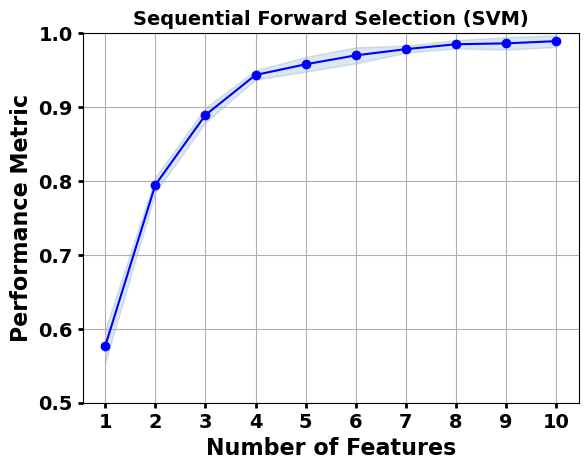

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import numpy as np

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can specify the kernel you want to use

# Apply sequential forward feature selection from mlxtend to the SVM classifier
num_features_to_select = 10  # Specify the number of features you want to select
sfs_selector = SequentialFeatureSelector(svm_classifier, 
                                         k_features=num_features_to_select, 
                                         forward=True, floating=False, verbose=2, 
                                         scoring='accuracy', cv=5)
X_train_selected = sfs_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = sfs_selector.transform(X_test_scaled)

# Train SVM classifier on the selected features
svm_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = np.array(sfs_selector.k_feature_idx_)
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)

# Plot the results on tranning set
fig1 = plot_sfs(sfs_selector.get_metric_dict(), kind='std_dev')
plt.ylim([0.5, 1])

plt.title('Sequential Forward Selection (SVM)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Features', fontsize=16, fontweight='bold')
plt.ylabel('Performance Metric', fontsize=16, fontweight='bold')
plt.grid()

# Make x and y ticks bold
plt.gca().tick_params(axis='x', which='both', labelsize=14, width=2)
plt.gca().tick_params(axis='y', which='both', labelsize=14, width=2)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_test and y_pred are your actual and predicted labels respectively
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Coefficient:", "{:.2f}%".format(kappa * 100))
# Assuming y_test and y_pred are your actual and predicted labels respectively
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print ("Precision:" "{:.2f}%".format(precision * 100))
print("Recall:", "{:.2f}%".format(recall * 100))
print("F1 Score:", "{:.2f}%".format(f1_score * 100))

# Print classification report
print("Classification Report SVM:")
print(classification_report(y_test, y_pred))

Cohen's Kappa Coefficient: 96.48%
Precision:97.18%
Recall: 97.19%
F1 Score: 97.17%
Classification Report SVM:
              precision    recall  f1-score   support

        2006       0.99      1.00      1.00       214
        2016       1.00      1.00      1.00       129
        2017       0.88      0.83      0.85        35
        2019       0.95      0.99      0.97       125
        2020       0.94      0.94      0.94       116
        2022       0.99      0.94      0.96        93

    accuracy                           0.97       712
   macro avg       0.96      0.95      0.95       712
weighted avg       0.97      0.97      0.97       712



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 510 out of 510 | elapsed:   33.0s finished

[2024-03-15 10:15:12] Features: 1/10 -- score: 0.4668674698795181[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 509 out of 509 | elapsed:   39.4s finished

[2024-03-15 10:15:52] Features: 2/10 -- score: 0.6945783132530121[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 508 out of 508 | elapsed:   44.7s finished

[2024-03-15 10:16:36] Features: 3/10 -- score: 0.8078313253012048[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Accuracy on the test set: 0.92
Selected feature indices: [  8 128 130 156 198 238 250 253 322 394]
Selected feature names: Index(['CV_Green', 'kurtosis_AVI', 'CVI', 'Std_NIRv', 'kurtosis_TVI',
       'kurtosis_MTCl', 'M3Cl', 'kurtosis_M3Cl', 'skewness_ratio2',
       'dissimilarity_kurtosis_band1'],
      dtype='object')


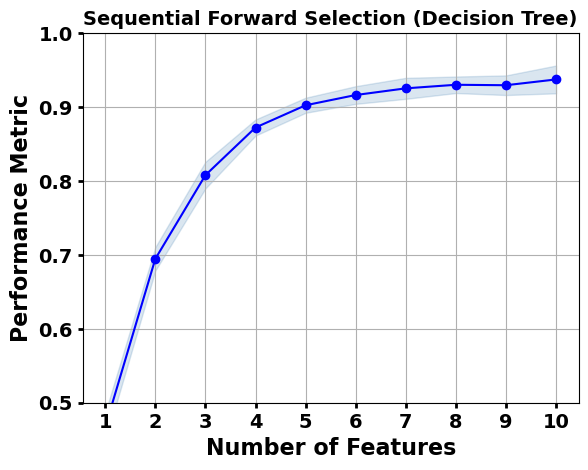

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import numpy as np

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Apply sequential forward feature selection from mlxtend to the Decision Tree classifier
num_features_to_select = 10  # Specify the number of features you want to select
sfs_selector = SequentialFeatureSelector(dt_classifier, 
                                         k_features=num_features_to_select, 
                                         forward=True, floating=False, verbose=2, 
                                         scoring='accuracy', cv=5)
X_train_selected = sfs_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = sfs_selector.transform(X_test_scaled)

# Train Decision Tree classifier on the selected features
dt_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = np.array(sfs_selector.k_feature_idx_)
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)


# Plot the results on tranning set
fig1 = plot_sfs(sfs_selector.get_metric_dict(), kind='std_dev')
plt.ylim([0.5, 1])

plt.title('Sequential Forward Selection (Decision Tree)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Features', fontsize=16, fontweight='bold')
plt.ylabel('Performance Metric', fontsize=16, fontweight='bold')
plt.grid()

# Make x and y ticks bold
plt.gca().tick_params(axis='x', which='both', labelsize=14, width=2)
plt.gca().tick_params(axis='y', which='both', labelsize=14, width=2)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 510 out of 510 | elapsed:   28.5s finished

[2024-04-03 08:51:34] Features: 1/12 -- score: 0.4668674698795181[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 509 out of 509 | elapsed:   33.8s finished

[2024-04-03 08:52:08] Features: 2/12 -- score: 0.6945783132530121[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 508 out of 508 | elapsed:   38.5s finished

[2024-04-03 08:52:46] Features: 3/12 -- score: 0.8078313253012048[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Accuracy on the test set: 0.91
Selected feature indices: [  8 128 130 152 156 198 238 250 253 322 394 501]
Selected feature names: Index(['CV_Green', 'kurtosis_AVI', 'CVI', 'skewness_NGRDI', 'Std_NIRv',
       'kurtosis_TVI', 'kurtosis_MTCl', 'M3Cl', 'kurtosis_M3Cl',
       'skewness_ratio2', 'dissimilarity_kurtosis_band1',
       'correlation_mean_band4'],
      dtype='object')


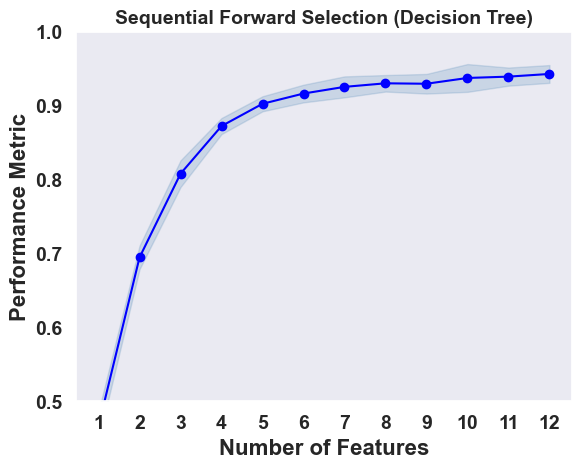

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import numpy as np

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Apply sequential forward feature selection from mlxtend to the Decision Tree classifier
num_features_to_select = 12  # Specify the number of features you want to select
sfs_selector = SequentialFeatureSelector(dt_classifier, 
                                         k_features=num_features_to_select, 
                                         forward=True, floating=False, verbose=2, 
                                         scoring='accuracy', cv=5)
X_train_selected = sfs_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = sfs_selector.transform(X_test_scaled)

# Train Decision Tree classifier on the selected features
dt_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = np.array(sfs_selector.k_feature_idx_)
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)


# Plot the results on tranning set
fig1 = plot_sfs(sfs_selector.get_metric_dict(), kind='std_dev')
plt.ylim([0.5, 1])

plt.title('Sequential Forward Selection (Decision Tree)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Features', fontsize=16, fontweight='bold')
plt.ylabel('Performance Metric', fontsize=16, fontweight='bold')
plt.grid()

# Make x and y ticks bold
plt.gca().tick_params(axis='x', which='both', labelsize=14, width=2)
plt.gca().tick_params(axis='y', which='both', labelsize=14, width=2)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_test and y_pred are your actual and predicted labels respectively
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Coefficient:", "{:.2f}%".format(kappa * 100))
# Assuming y_test and y_pred are your actual and predicted labels respectively
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print ("Precision:" "{:.2f}%".format(precision * 100))
print("Recall:", "{:.2f}%".format(recall * 100))
print("F1 Score:", "{:.2f}%".format(f1_score * 100))

# Print classification report
print("Classification Report Decision Tree:")
print(classification_report(y_test, y_pred))

Cohen's Kappa Coefficient: 89.98%
Precision:92.13%
Recall: 91.99%
F1 Score: 91.97%
Classification Report Decision Tree:
              precision    recall  f1-score   support

        2006       0.98      0.97      0.97       214
        2016       0.88      0.98      0.93       129
        2017       0.76      0.74      0.75        35
        2019       0.88      0.90      0.89       125
        2020       0.93      0.86      0.90       116
        2022       0.95      0.88      0.92        93

    accuracy                           0.92       712
   macro avg       0.90      0.89      0.89       712
weighted avg       0.92      0.92      0.92       712



### Took hours and hours to run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 510 out of 510 | elapsed: 38.6min finished

[2024-03-15 11:09:51] Features: 1/10 -- score: 0.4668674698795181[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 509 out of 509 | elapsed: 30.7min finished

[2024-03-15 11:40:34] Features: 2/10 -- score: 0.7542168674698795[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 508 out of 508 | elapsed: 27.5min finished

[2024-03-15 12:08:06] Features: 3/10 -- score: 0.8656626506024097[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Accuracy on the test set: 0.96
Selected feature indices: [  9 106 121 130 143 222 228 250 322 500]
Selected feature names: Index(['CV_Red', 'Std_NLI', 'Std_BAI', 'CVI', 'kurtosis_GRNDVI',
       'skewness_RERVI', 'kurtosis_sCCCI', 'M3Cl', 'skewness_ratio2',
       'correlation_mean_band3'],
      dtype='object')


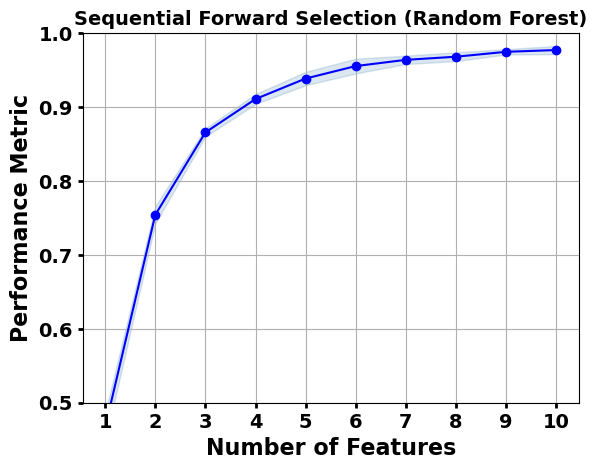

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import numpy as np

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Decision Tree classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Apply sequential forward feature selection from mlxtend to the Random Forest classifier
num_features_to_select = 10  # Specify the number of features you want to select
sfs_selector = SequentialFeatureSelector(random_forest_classifier, 
                                         k_features=num_features_to_select, 
                                         forward=True, floating=False, verbose=2, 
                                         scoring='accuracy', cv=5)
X_train_selected = sfs_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = sfs_selector.transform(X_test_scaled)

# Train Random Forest classifier on the selected features
random_forest_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = np.array(sfs_selector.k_feature_idx_)
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)


# Plot the results on tranning set
fig1 = plot_sfs(sfs_selector.get_metric_dict(), kind='std_dev')
plt.ylim([0.5, 1])

plt.title('Sequential Forward Selection (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Features', fontsize=16, fontweight='bold')
plt.ylabel('Performance Metric', fontsize=16, fontweight='bold')
plt.grid()

# Make x and y ticks bold
plt.gca().tick_params(axis='x', which='both', labelsize=14, width=2)
plt.gca().tick_params(axis='y', which='both', labelsize=14, width=2)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_test and y_pred are your actual and predicted labels respectively
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Coefficient:", "{:.2f}%".format(kappa * 100))
# Assuming y_test and y_pred are your actual and predicted labels respectively
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print ("Precision:" "{:.2f}%".format(precision * 100))
print("Recall:", "{:.2f}%".format(recall * 100))
print("F1 Score:", "{:.2f}%".format(f1_score * 100))

# Print classification report
print("Classification Report Random Forest:")
print(classification_report(y_test, y_pred))

In [11]:
#Saving RandomForest Classifier
from joblib import dump, load
import os

# Specify the directory where you want to save the model
save_directory = 'S:/mc5545/SA_Drone_data/trained_classifiers/'

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Save the trained Random Forest classifier in the specified directory
model_filename = 'random_forest_model.joblib'
model_filepath = os.path.join(save_directory, model_filename)
dump(random_forest_classifier, model_filepath)

# Print the full path to the saved model
print(f'Model saved to: {model_filepath}')


Model saved to: S:/mc5545/SA_Drone_data/trained_classifiers/random_forest_model.joblib


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 510 out of 510 | elapsed: 75.3min finished

[2024-03-17 20:49:49] Features: 1/10 -- score: 0.5289156626506024[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 509 out of 509 | elapsed: 113.8min finished

[2024-03-17 22:43:35] Features: 2/10 -- score: 0.7259036144578312[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 508 out of 508 | elapsed: 154.6min finished

[2024-03-18 01:18:13] Features: 3/10 -- score: 0.8481927710843374[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

Accuracy on the test set: 0.96
Selected feature indices: [  8  29 120 130 225 228 319 412 424 500]
Selected feature names: Index(['CV_Green', 'CV_ReCI', 'BAI', 'CVI', 'sCCCI', 'kurtosis_sCCCI',
       'CV_ratio1', 'homogeneity_CV_band3', 'homogeneity_skewness_band3',
       'correlation_mean_band3'],
      dtype='object')
Model saved to: S:/mc5545/SA_Drone_data/trained_classifiers/GradientBoosting_model.joblib


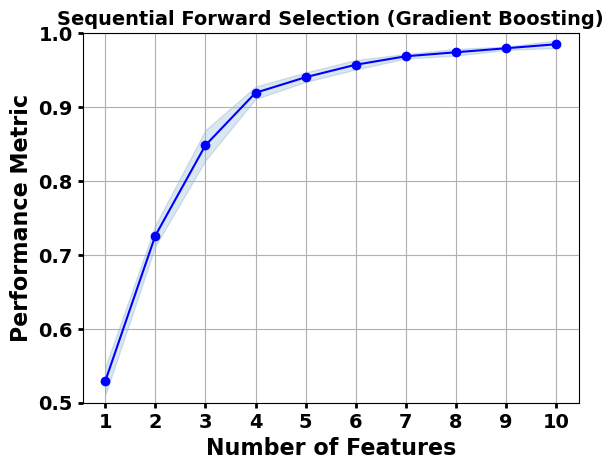

In [3]:
#need to run this in night
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import numpy as np

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a GradientBoosting classifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)

# Apply sequential forward feature selection from mlxtend to the GradientBoosting classifier
num_features_to_select = 10  # Specify the number of features you want to select
sfs_selector = SequentialFeatureSelector(gradient_boosting_classifier, 
                                         k_features=num_features_to_select, 
                                         forward=True, floating=False, verbose=2, 
                                         scoring='accuracy', cv=5)
X_train_selected = sfs_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = sfs_selector.transform(X_test_scaled)

# Train GradientBoosting classifier on the selected features
gradient_boosting_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = gradient_boosting_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = np.array(sfs_selector.k_feature_idx_)
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)



#Saving GradientBoosting Classifier
from joblib import dump, load
import os

# Specify the directory where you want to save the model
save_directory = 'S:/mc5545/SA_Drone_data/trained_classifiers/'

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Save the trained GradientBoosting classifier in the specified directory
model_filename = 'GradientBoosting_model.joblib'
model_filepath = os.path.join(save_directory, model_filename)
dump(gradient_boosting_classifier, model_filepath)

# Print the full path to the saved model
print(f'Model saved to: {model_filepath}')



# Plot the results on tranning set
fig1 = plot_sfs(sfs_selector.get_metric_dict(), kind='std_dev')
plt.ylim([0.5, 1])

plt.title('Sequential Forward Selection (Gradient Boosting)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Features', fontsize=16, fontweight='bold')
plt.ylabel('Performance Metric', fontsize=16, fontweight='bold')
plt.grid()

# Make x and y ticks bold
plt.gca().tick_params(axis='x', which='both', labelsize=14, width=2)
plt.gca().tick_params(axis='y', which='both', labelsize=14, width=2)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_test and y_pred are your actual and predicted labels respectively
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Coefficient:", "{:.2f}%".format(kappa * 100))
# Assuming y_test and y_pred are your actual and predicted labels respectively
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print ("Precision:" "{:.2f}%".format(precision * 100))
print("Recall:", "{:.2f}%".format(recall * 100))
print("F1 Score:", "{:.2f}%".format(f1_score * 100))

# Print classification report
print("Classification Report GradienBoosting:")
print(classification_report(y_test, y_pred))

Classification Report GradienBoosting:
              precision    recall  f1-score   support

        2006       0.98      0.99      0.98       214
        2016       0.96      1.00      0.98       129
        2017       0.91      0.86      0.88        35
        2019       0.92      0.95      0.94       125
        2020       0.97      0.94      0.96       116
        2022       0.98      0.91      0.94        93

    accuracy                           0.96       712
   macro avg       0.95      0.94      0.95       712
weighted avg       0.96      0.96      0.96       712



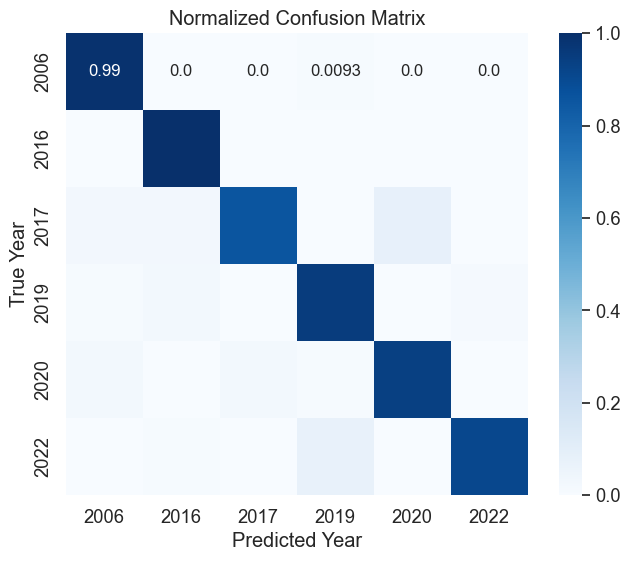

In [18]:
#For GradientBoosting
from sklearn.metrics import confusion_matrix
years = [2006, 2016, 2017, 2019, 2020, 2022]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2', cmap='Blues', cbar=True, square=True,
            xticklabels=years, yticklabels=years, annot_kws={"size": 12})

plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Year')
plt.ylabel('True Year')
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 510 out of 510 | elapsed: 67.7min finished

[2024-03-22 09:12:11] Features: 1/10 -- score: 0.5710843373493976[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 509 out of 509 | elapsed: 136.7min finished

[2024-03-22 11:28:56] Features: 2/10 -- score: 0.7927710843373493[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 508 out of 508 | elapsed: 194.9min finished

[2024-03-22 14:43:52] Features: 3/10 -- score: 0.8927710843373493[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

Accuracy on the test set: 0.96
Selected feature indices: [  4  10 130 248 284 300 319 353 424 500]
Selected feature names: Index(['std_Green', 'CV_RedEdge', 'CVI', 'kurtosis_PSRI', 'CV_LCI',
       'RTVI_core', 'CV_ratio1', 'variance_CV_band4',
       'homogeneity_skewness_band3', 'correlation_mean_band3'],
      dtype='object')
Cohen's Kappa Coefficient: 95.60%
Precision:96.46%
Recall: 96.49%
F1 Score: 96.47%
Classification Report MLP:
              precision    recall  f1-score   support

        2006       0.97      1.00      0.98       214
        2016       0.99      0.99      0.99       129
        2017       0.91      0.86      0.88        35
        2019       0.94      0.93      0.94       125
        2020       0.96      0.97      0.96       116
        2022       0.97      0.95      0.96        93

    accuracy                           0.96       712
   macro avg       0.96      0.95      0.95       712
weighted avg       0.96      0.96      0.96       712

Model saved to: 

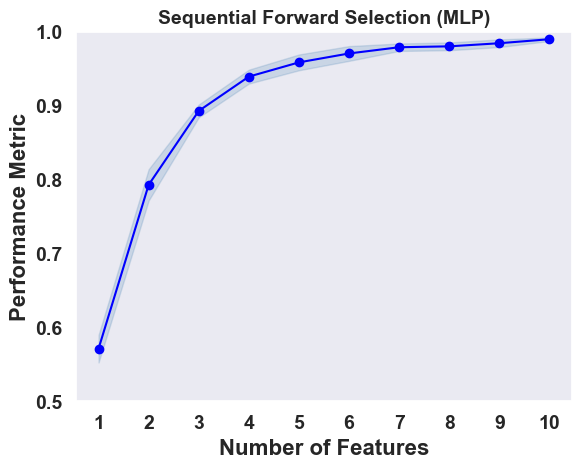

In [6]:
#need to run this in night
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import numpy as np


# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=10000, random_state=42)



# Apply sequential forward feature selection from mlxtend to the MLP classifier
num_features_to_select = 10  # Specify the number of features you want to select
sfs_selector = SequentialFeatureSelector(mlp_classifier, 
                                         k_features=num_features_to_select, 
                                         forward=True, floating=False, verbose=2, 
                                         scoring='accuracy', cv=5)

X_train_selected = sfs_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = sfs_selector.transform(X_test_scaled)

# Train MLP classifier on the selected features
mlp_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = mlp_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = np.array(sfs_selector.k_feature_idx_)
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)


from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_test and y_pred are your actual and predicted labels respectively
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Coefficient:", "{:.2f}%".format(kappa * 100))
# Assuming y_test and y_pred are your actual and predicted labels respectively
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print ("Precision:" "{:.2f}%".format(precision * 100))
print("Recall:", "{:.2f}%".format(recall * 100))
print("F1 Score:", "{:.2f}%".format(f1_score * 100))

# Print classification report
print("Classification Report MLP:")
print(classification_report(y_test, y_pred))

#Saving mlp Classifier
from joblib import dump, load
import os

# Specify the directory where you want to save the model
save_directory = 'S:/mc5545/SA_Drone_data/trained_classifiers/'

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Save the trained Random Forest classifier in the specified directory
model_filename = 'mlp_model.joblib'
model_filepath = os.path.join(save_directory, model_filename)
dump(mlp_classifier, model_filepath)

# Print the full path to the saved model
print(f'Model saved to: {model_filepath}')



# Plot the results on tranning set
fig1 = plot_sfs(sfs_selector.get_metric_dict(), kind='std_dev')
plt.ylim([0.5, 1])

plt.title('Sequential Forward Selection (MLP)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Features', fontsize=16, fontweight='bold')
plt.ylabel('Performance Metric', fontsize=16, fontweight='bold')
plt.grid()

# Make x and y ticks bold
plt.gca().tick_params(axis='x', which='both', labelsize=14, width=2)
plt.gca().tick_params(axis='y', which='both', labelsize=14, width=2)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

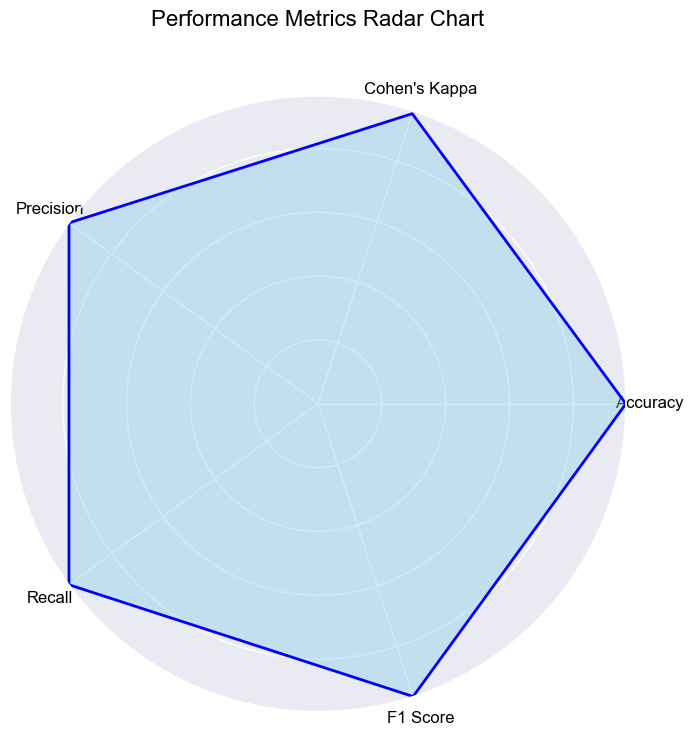

In [7]:
import matplotlib.pyplot as plt

# Define the performance metrics
metrics = ['Accuracy', 'Cohen\'s Kappa', 'Precision', 'Recall', 'F1 Score']

# Define the values for each metric
values = [accuracy, kappa, precision, recall, f1_score]

# Number of performance metrics
num_metrics = len(metrics)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)

# Add labels
ax.set_yticklabels([])
plt.xticks(angles[:-1], metrics, color='black', size=12)
plt.title('Performance Metrics Radar Chart', size=16, color='black', y=1.1)
plt.show()


In [19]:
import plotly.graph_objects as go
from sklearn.metrics import classification_report

# Calculate classification report
classification_rep = classification_report(y_test, y_pred)

def parse_classification_report(report):
    lines = report.split('\n')
    class_names = []
    metrics = {'precision': [], 'recall': [], 'f1-score': []}
    
    for line in lines[2:-5]:
        parts = line.split()
        if len(parts) > 0:
            class_names.append(parts[0])
            metrics['precision'].append(float(parts[1]))
            metrics['recall'].append(float(parts[2]))
            metrics['f1-score'].append(float(parts[3]))
    
    return class_names, metrics

# Parse classification report
class_names, metrics = parse_classification_report(classification_rep)

# Create traces for radar plot
data = []
for cls in class_names:
    data.append(go.Scatterpolar(
        r=[metrics['precision'][class_names.index(cls)], 
           metrics['recall'][class_names.index(cls)], 
           metrics['f1-score'][class_names.index(cls)]],
        theta=['Precision', 'Recall', 'F1-Score'],
        fill='toself',
        name=cls
    ))

# Create layout for radar plot
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0.9, 1]  # Adjust the range as needed
        )),
    title='Classification Metrics Radar Chart'
)

# Create figure and plot
fig = go.Figure(data=data, layout=layout)
fig.show()


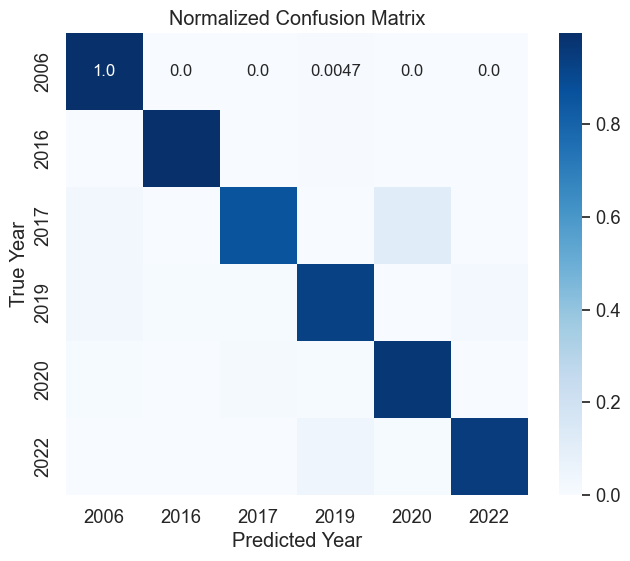

In [14]:
#For MLP
from sklearn.metrics import confusion_matrix
years = [2006, 2016, 2017, 2019, 2020, 2022]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2', cmap='Blues', cbar=True, square=True,
            xticklabels=years, yticklabels=years, annot_kws={"size": 12})

plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Year')
plt.ylabel('True Year')
plt.show()

In [5]:
#sfs_selector.subsets_
metric_dict=sfs_selector.get_metric_dict(confidence_interval=0.95)
df_results=pd.DataFrame.from_dict(metric_dict).T


# Assuming df_results is your DataFrame and X is your feature DataFrame

for i in range(len(df_results.index)):
    z = np.array(df_results.feature_idx[i+1])
    #print('Selected feature indices:', z)
    # Get the names of the selected features
    selected_feature_names = X.columns[z]  # Assuming X is a DataFrame
    #print('Selected feature names:', selected_feature_names)
    # Replace the feature_names column in df_results
    df_results.at[i+1, 'feature_names'] = selected_feature_names.tolist()

#print(df_results)

# Save df_results to a CSV file in a directory
directory_path='S:/mc5545/SA_Drone_data/Indices_csv/'
csv_file_path = directory_path + 'MLP.csv'
df_results.to_csv(csv_file_path, index=False)
print("DataFrame saved as CSV to:", csv_file_path)

DataFrame saved as CSV to: S:/mc5545/SA_Drone_data/Indices_csv/MLP.csv


## Embedded Feature Selection

In [7]:
#%% DecisionTreeClassifier with embedded feature_importances_

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for Decision Tree as well)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train Decision Tree classifier
dt_classifier.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = dt_classifier.feature_importances_

# Sort indices based on feature importance
sorted_feature_indices = np.argsort(feature_importances)[::-1]

# Select the top num_features_to_select features
num_features_to_select = 10  # Specify the number of features you want to select
selected_feature_indices = sorted_feature_indices[:num_features_to_select]
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)

# Train Decision Tree classifier on the selected features
dt_classifier.fit(X_train_scaled[:, selected_feature_indices], y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_scaled[:, selected_feature_indices])

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

Selected feature indices: [130 253   8 307 260 225 236 246 343  54]
Selected feature names: Index(['CVI', 'kurtosis_M3Cl', 'CV_Green', 'skewness_REGNDVI', 'REP', 'sCCCI',
       'Std_MTCl', 'Std_PSRI', 'mean_skewness_band2', 'CV_SR'],
      dtype='object')
Accuracy on the test set: 0.90


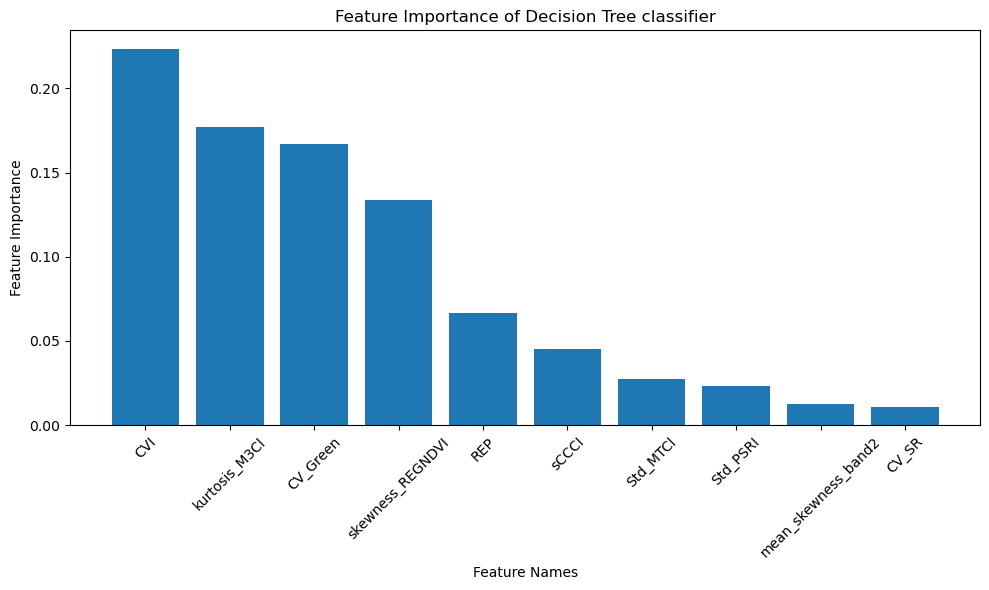

In [8]:
import matplotlib.pyplot as plt

# Plot the feature importance values
plt.figure(figsize=(10, 6))
plt.bar(range(num_features_to_select), feature_importances[selected_feature_indices], align='center')
plt.xticks(range(num_features_to_select), selected_feature_names, rotation=45)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Decision Tree classifier')
plt.tight_layout()
plt.show()

In [11]:
#%% RandomForestClassifier with embedded feature_importances_

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for Decision Tree as well)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest classifier
RF_classifier = RandomForestClassifier(random_state=42)

# Train Random Forest classifier
RF_classifier.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = RF_classifier.feature_importances_

# Sort indices based on feature importance
sorted_feature_indices = np.argsort(feature_importances)[::-1]

# Select the top num_features_to_select features
num_features_to_select = 10  # Specify the number of features you want to select
selected_feature_indices = sorted_feature_indices[:num_features_to_select]
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)

# Train RandomForest classifier on the selected features
RF_classifier.fit(X_train_scaled[:, selected_feature_indices], y_train)

# Make predictions on the test set
y_pred = RF_classifier.predict(X_test_scaled[:, selected_feature_indices])

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')#%% RandomForestClassifier with embedded feature_importances_



Selected feature indices: [130  10   8 121 225 235 220  30 253 214]
Selected feature names: Index(['CVI', 'CV_RedEdge', 'CV_Green', 'Std_BAI', 'sCCCI', 'MTCl', 'RERVI',
       'NDRE', 'kurtosis_M3Cl', 'CV_MSR_Rededge'],
      dtype='object')
Accuracy on the test set: 0.93


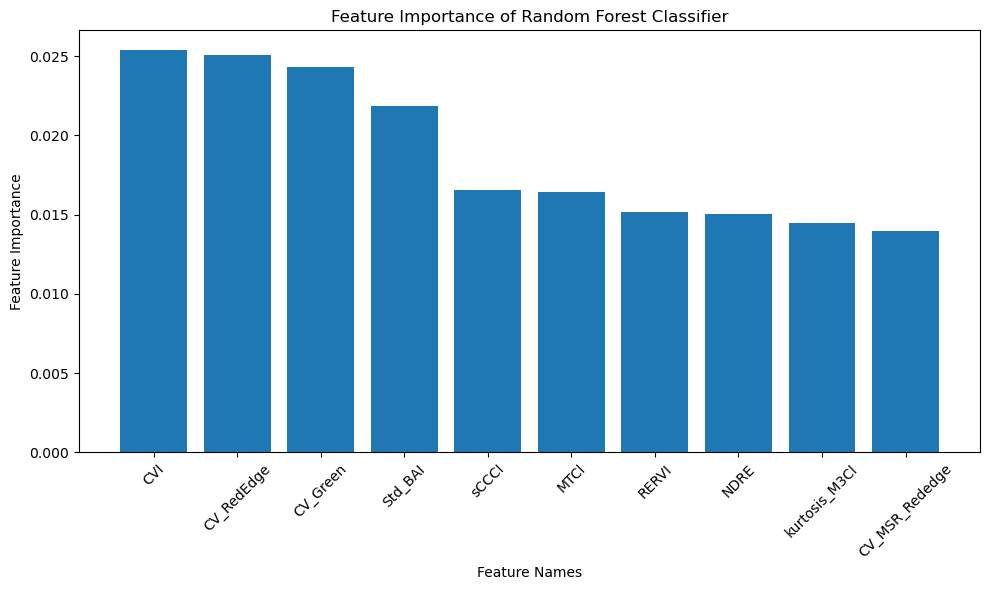

In [12]:
import matplotlib.pyplot as plt

# Plot the feature importance values
plt.figure(figsize=(10, 6))
plt.bar(range(num_features_to_select), feature_importances[selected_feature_indices], align='center')
plt.xticks(range(num_features_to_select), selected_feature_names, rotation=45)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Random Forest Classifier')
plt.tight_layout()
plt.show()


In [13]:
#%% GradientBoostingClassifier with embedded feature_importances_

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for Decision Tree as well)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a GradientBoosting classifier
GB_classifier = GradientBoostingClassifier(random_state=42)

# Train GradientBoosting classifier
GB_classifier.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = GB_classifier.feature_importances_

# Sort indices based on feature importance
sorted_feature_indices = np.argsort(feature_importances)[::-1]

# Select the top num_features_to_select features
num_features_to_select = 10  # Specify the number of features you want to select
selected_feature_indices = sorted_feature_indices[:num_features_to_select]
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)

# Train GradientBoosting classifier on the selected features
GB_classifier.fit(X_train_scaled[:, selected_feature_indices], y_train)

# Make predictions on the test set
y_pred = GB_classifier.predict(X_test_scaled[:, selected_feature_indices])

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')#%% GradientBoosting with embedded feature_importances_



Selected feature indices: [235 307 164  10 250 260   9   8 500  34]
Selected feature names: Index(['MTCl', 'skewness_REGNDVI', 'CV_NormG', 'CV_RedEdge', 'M3Cl', 'REP',
       'CV_Red', 'CV_Green', 'correlation_mean_band3', 'CV_NDRE'],
      dtype='object')
Accuracy on the test set: 0.91


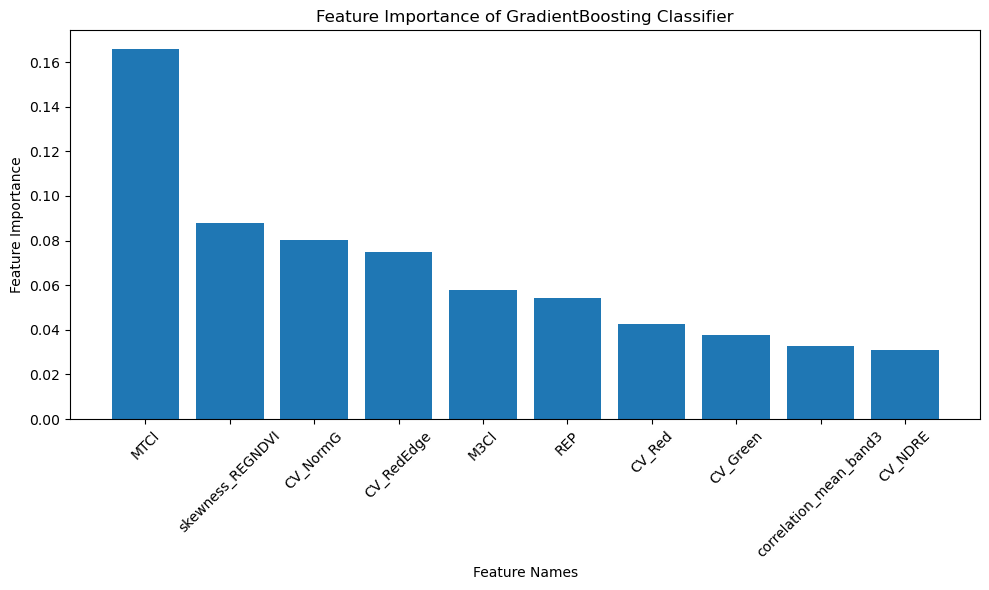

In [14]:
import matplotlib.pyplot as plt

# Plot the feature importance values
plt.figure(figsize=(10, 6))
plt.bar(range(num_features_to_select), feature_importances[selected_feature_indices], align='center')
plt.xticks(range(num_features_to_select), selected_feature_names, rotation=45)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of GradientBoosting Classifier')
plt.tight_layout()
plt.show()


https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

https://stackoverflow.com/questions/65988614/visualizing-a-huge-correlation-matrix-in-python